In [0]:
import tensorflow as tf

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2019-08-29 10:25:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 2607:f8b0:4001:c12::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  31.7MB/s    in 6.3s    

2019-08-29 10:25:45 (30.5 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2019-08-29 10:25:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tm

In [0]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
training_dir = "/tmp/rps/"
validation_dir = "/tmp/rps-test-set/"

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255.,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip = True,
                                  fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255.)

In [8]:
train_generator = train_datagen.flow_from_directory(training_dir,
                                                   target_size=(150,150),
                                                   class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 18, 18, 128)      

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [20]:
history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=100, verbose=1, callbacks=[callbacks])

Epoch 1/100
79/79 [==============================] - 27s 340ms/step - loss: 1.1368 - acc: 0.3452 - val_loss: 1.1870 - val_acc: 0.3333
Epoch 2/100
79/79 [==============================] - 24s 300ms/step - loss: 1.0746 - acc: 0.4218 - val_loss: 0.9438 - val_acc: 0.5269
Epoch 3/100
79/79 [==============================] - 24s 305ms/step - loss: 0.9558 - acc: 0.5679 - val_loss: 0.6728 - val_acc: 0.6667
Epoch 4/100
79/79 [==============================] - 24s 301ms/step - loss: 0.7194 - acc: 0.6925 - val_loss: 0.4466 - val_acc: 0.8091
Epoch 5/100
79/79 [==============================] - 24s 304ms/step - loss: 0.5313 - acc: 0.7683 - val_loss: 0.2126 - val_acc: 0.9005
Epoch 6/100
79/79 [==============================] - 24s 304ms/step - loss: 0.3954 - acc: 0.8480 - val_loss: 0.1614 - val_acc: 0.9382
Epoch 7/100
79/79 [==============================] - 24s 305ms/step - loss: 0.3236 - acc: 0.8766 - val_loss: 0.2127 - val_acc: 0.9113
Epoch 8/100
79/79 [==============================] - 24s 301ms

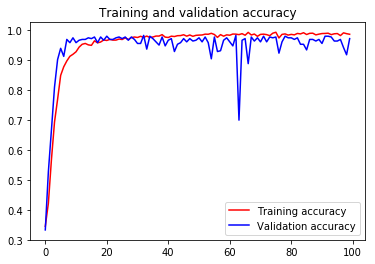

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()